In [70]:
import numpy as np
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

In [71]:
N = 100
l0 = 1.0
x = (torch.arange(N)*l0).requires_grad_(True)
y = torch.zeros(N).requires_grad_(True)
kappa0 = torch.zeros(N-2)
kappa0[40:60] = 1.0

In [72]:
dt = 0.01
F = -0.5
alpha = 1.0
beta = 1.0
K_v = 100
for step in range(50000):
    # stretching energy piece
    dx_f = x[1:]-x[:-1]
    dy_f = y[1:]-y[:-1]
    l_f = torch.sqrt(dx_f**2+dy_f**2)
    # bending energy piece
    d2y = y[2:]-2*y[1:-1]+y[:-2]
    d2x = x[2:]-2*x[1:-1]+x[:-2]
    dx = x[2:]-x[:-2]
    dy = y[2:]-y[:-2]
    curvature = (d2y*dx-d2x*dy)/(dx**2+dy**2)**1.5
    bending_energy = 0.5*(curvature-kappa0)**2
    energy = alpha*torch.sum((l_f-l0)**2) + beta*torch.sum(bending_energy*l_f[1:]) - F*(x[-1]-x[0]) + 0.5*K_v*(y[0]**2+y[-1]**2)
    energy.backward()
    with torch.no_grad():
        x -= dt*x.grad
        y -= dt*y.grad
        x.grad.zero_()
        y.grad.zero_()

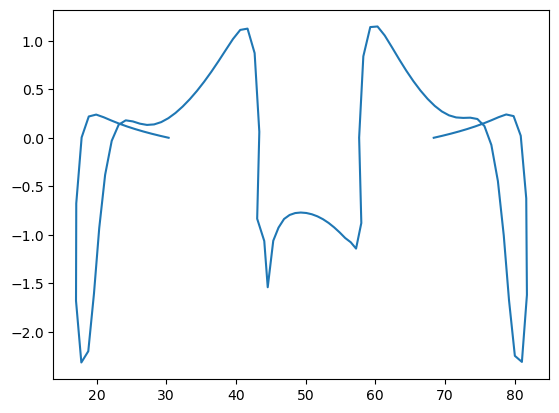

In [73]:
plt.plot(x.detach().numpy(), y.detach().numpy())
plt.show()